In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
from mpl_toolkits.basemap import Basemap
#import metpy.calc as mpcalc
#from metpy.units import units
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
#from netCDF4 import date2num,num2date

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
#OLD_WRFIN_D03
old_wrfinput_d03 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunSST/Originals/wrfinput_d03')
#SST run
sst_wrfinput_d03 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunSST/wrfinput_d03')
#current + SST run 
cur_sst_wrfinput_d03 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunCurrent/wrfinput_d03')


C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
old_d03_SST = old_wrfinput_d03.SST.values-273.15
old_d03_UOCE = old_wrfinput_d03.UOCE.values
old_d03_VOCE = old_wrfinput_d03.VOCE.values
XLAT = old_wrfinput_d03.XLAT.values
XLON = old_wrfinput_d03.XLONG.values
sst_d03_SST = sst_wrfinput_d03.SST.values-273.15
sst_d03_UOCE = sst_wrfinput_d03.UOCE.values
sst_d03_VOCE = sst_wrfinput_d03.VOCE.values
cur_d03_SST = cur_sst_wrfinput_d03.SST.values-273.15
cur_d03_UOCE = cur_sst_wrfinput_d03.UOCE.values
cur_d03_VOCE = cur_sst_wrfinput_d03.VOCE.values

print('XLAT: ', XLAT.shape, '\nXLON: ', XLON.shape )
print ('old_UOCE: ',old_d03_UOCE.shape, '\nold_VOCE: ',  old_d03_VOCE.shape, '\nold_SST: ', old_d03_SST.shape)
print ('sst_UOCE: ',sst_d03_UOCE.shape, '\nsst_VOCE: ',  sst_d03_VOCE.shape, '\nsst_SST: ', sst_d03_SST.shape)
print ('cur_UOCE: ',cur_d03_UOCE.shape, '\ncur_VOCE: ',  cur_d03_VOCE.shape, '\ncur_SST: ', cur_d03_SST.shape)

XLAT:  (1, 474, 639) 
XLON:  (1, 474, 639)
old_UOCE:  (1, 474, 639) 
old_VOCE:  (1, 474, 639) 
old_SST:  (1, 474, 639)
sst_UOCE:  (1, 474, 639) 
sst_VOCE:  (1, 474, 639) 
sst_SST:  (1, 474, 639)
cur_UOCE:  (1, 474, 639) 
cur_VOCE:  (1, 474, 639) 
cur_SST:  (1, 474, 639)


C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


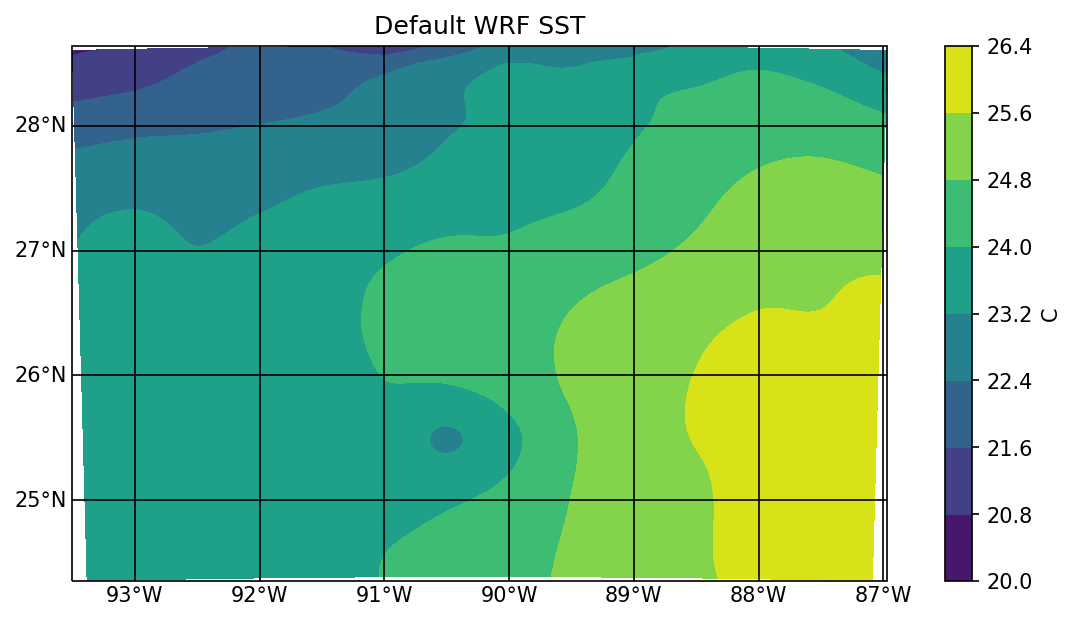

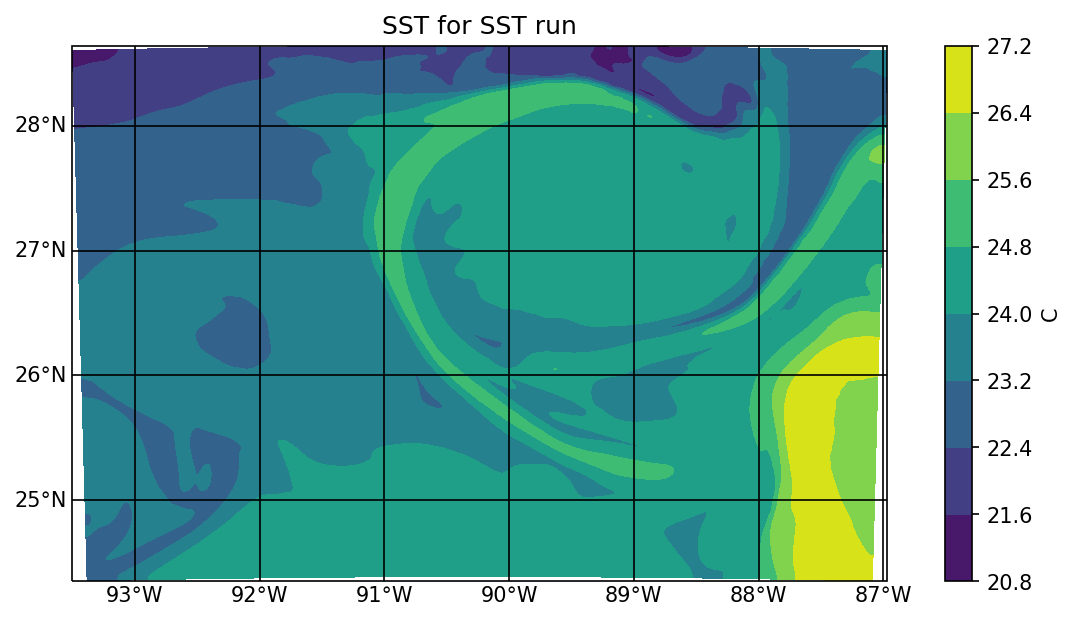

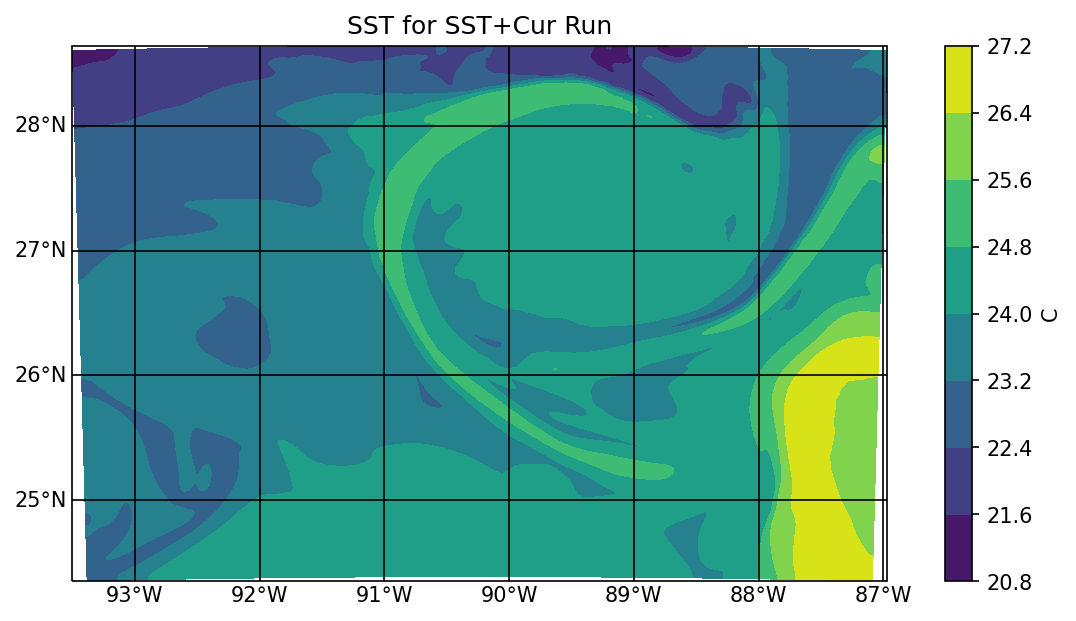

In [6]:
#SST plots 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], old_d03_SST[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Default WRF SST')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'WRF_defuaultSST.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], sst_d03_SST[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('SST for SST run')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'sstRun_SST.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], cur_d03_SST[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('SST for SST+Cur Run')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'sstCurRun_SST.png', bbox_inches = 'tight',dpi = 150)
plt.show()

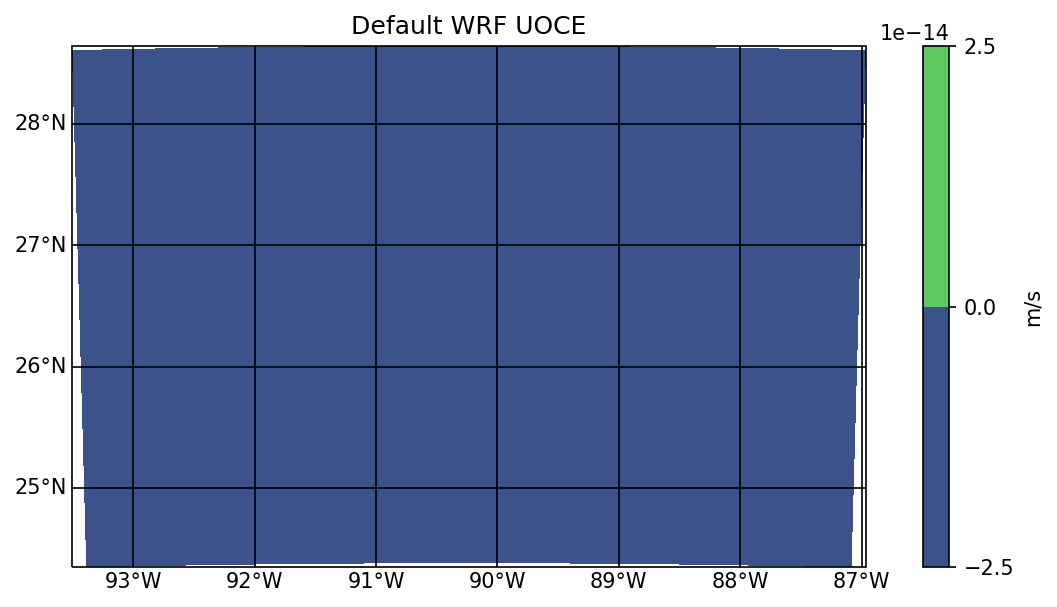

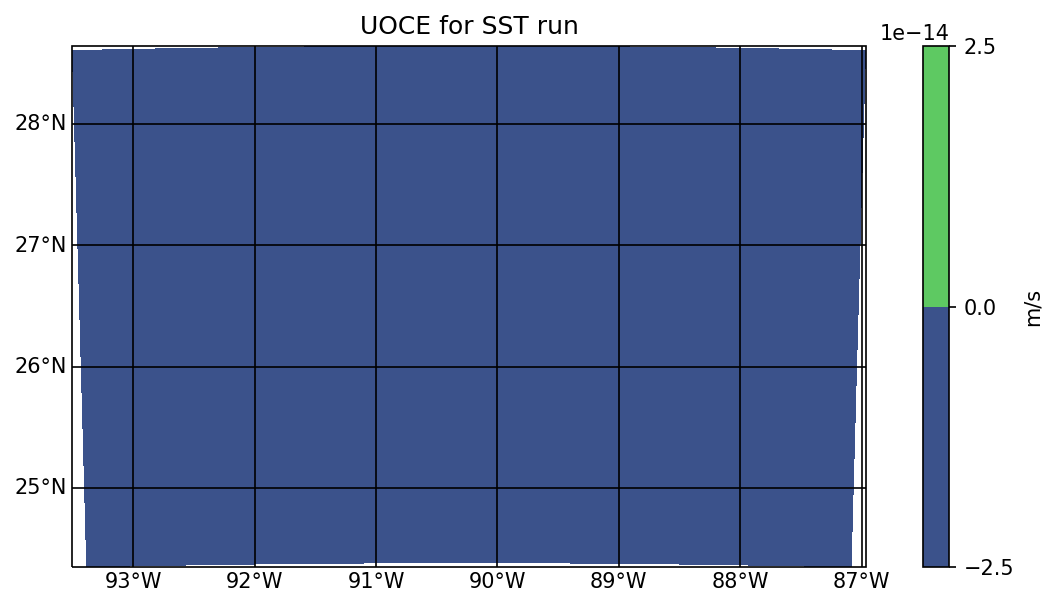

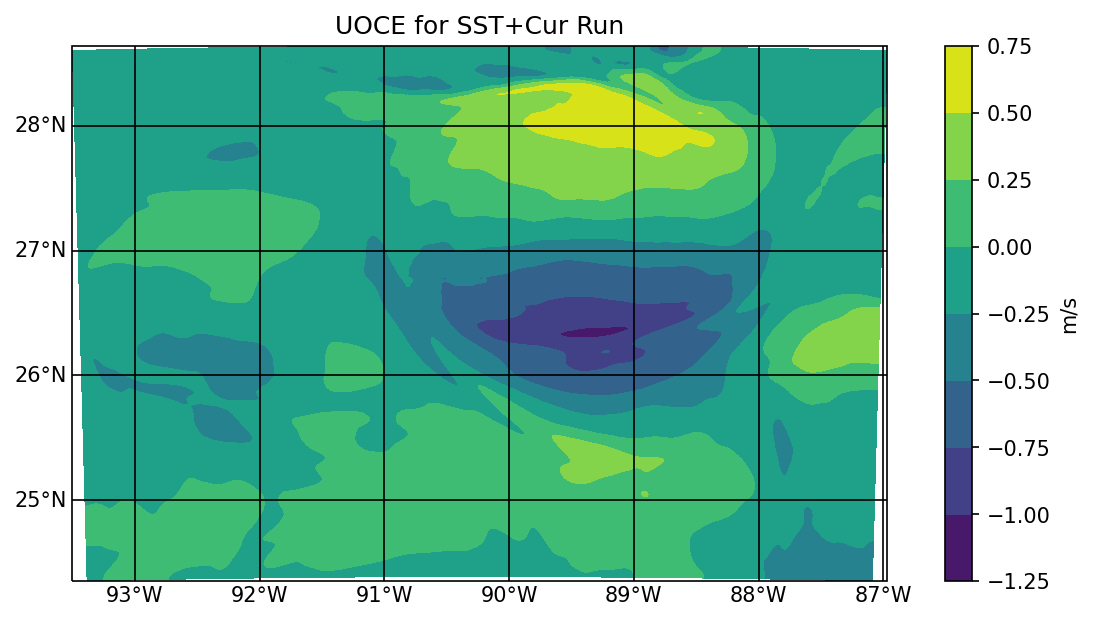

In [7]:
#UOCE plots 

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], old_d03_UOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Default WRF UOCE')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'WRF_defuaultUOCE.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], sst_d03_UOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE for SST run')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'sstRun_UOCE.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], cur_d03_UOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE for SST+Cur Run')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'sstCurRun_UOCE.png', bbox_inches = 'tight',dpi = 150)
plt.show()

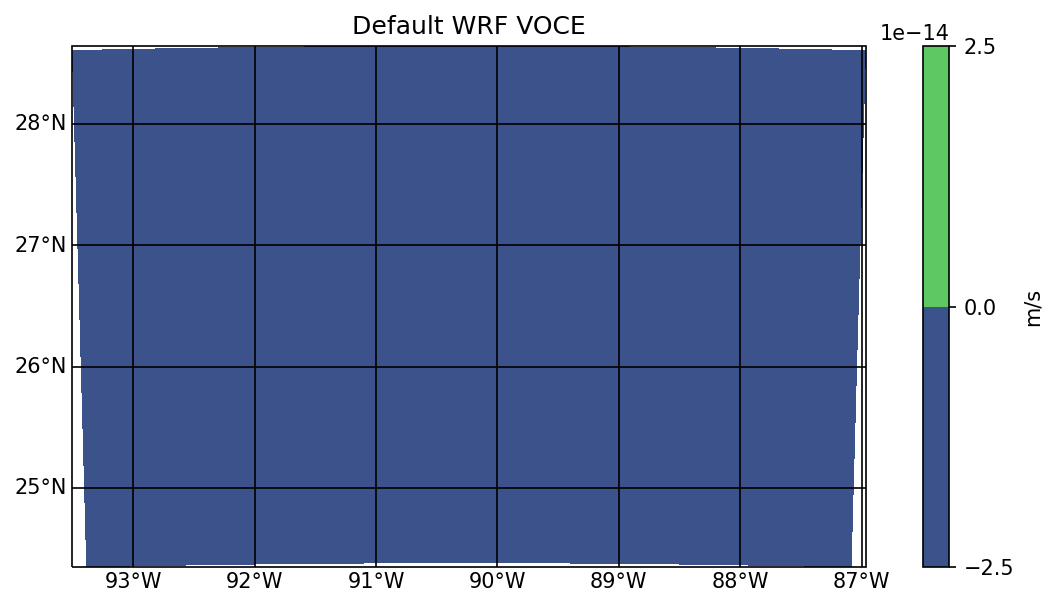

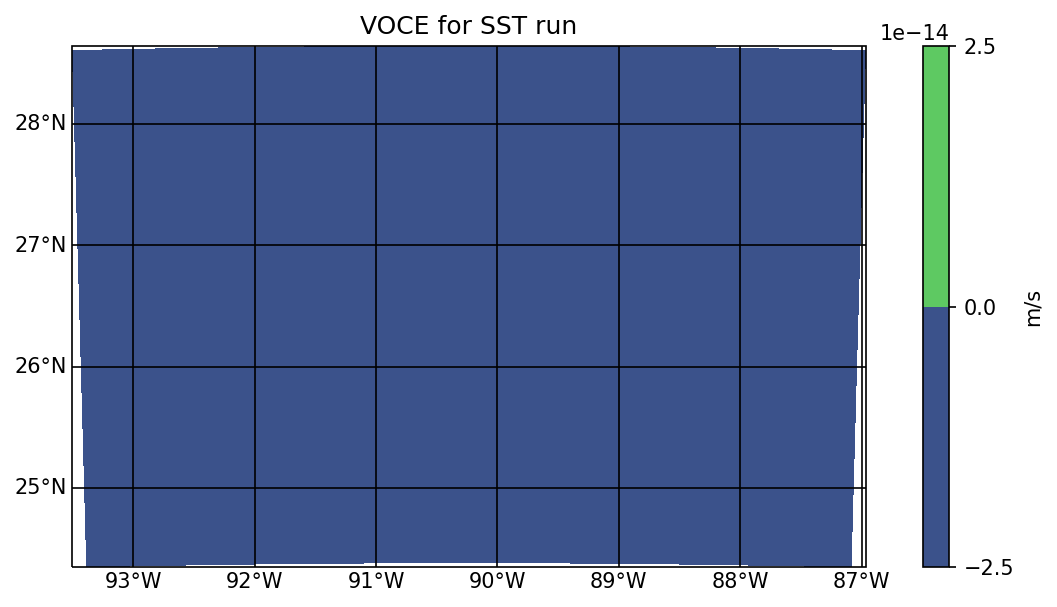

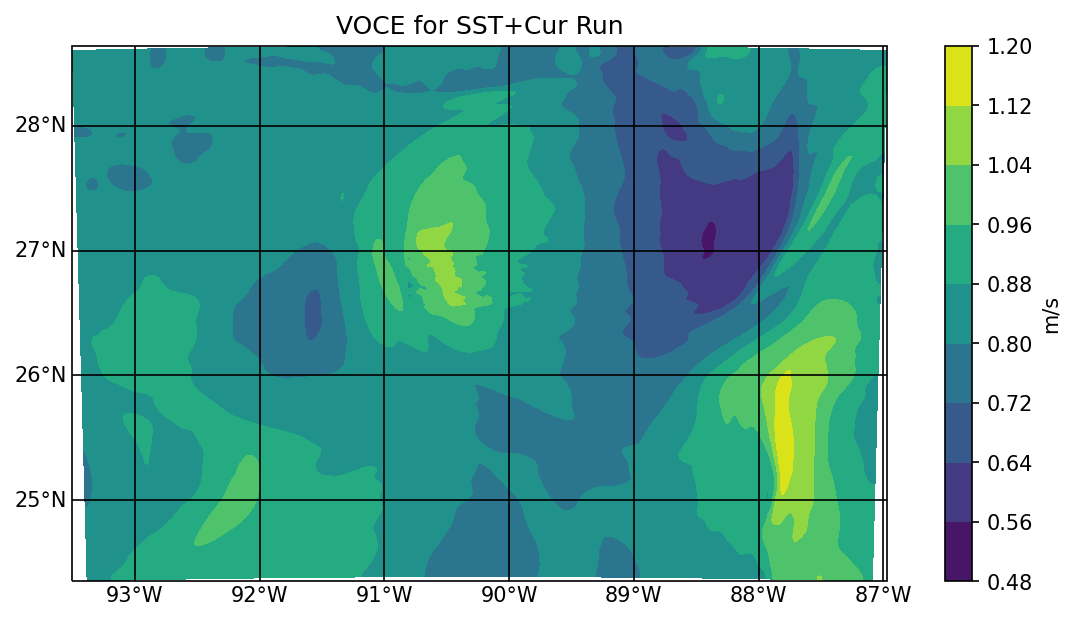

In [8]:
#VOCE plots 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], old_d03_VOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Default WRF VOCE')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'WRF_defuaultVOCE.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], sst_d03_VOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('VOCE for SST run')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'sstRun_VOCE.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON[0,:,:], XLAT[0,:,:], cur_d03_VOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('VOCE for SST+Cur Run')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'sstCurRun_VOCE.png', bbox_inches = 'tight',dpi = 150)
plt.show()


In [ ]:
#current speed plot with vector 


